In [1785]:
#import essential function for research
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn import linear_model, svm, gaussian_process
from sklearn.cross_validation import cross_val_score, train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA




import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline
%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [1786]:
#data extraction
train = pd.read_csv('train.csv')


In [1787]:
#1.Data Exploration and Visualization
#1.1check index
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1788]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1789]:
print('train : ' + str(train.shape))

train : (1460, 81)


In [1790]:
#1.2.check null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [1791]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include = ['object']).columns
numerical_features = train.select_dtypes(exclude = ['object']).columns
numerical_features = numerical_features.drop('SalePrice')
print('Numerical features : ' + str(len(numerical_features)))
print('Categorical features : ' + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features : 37
Categorical features : 43


Skewness: 1.882876


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

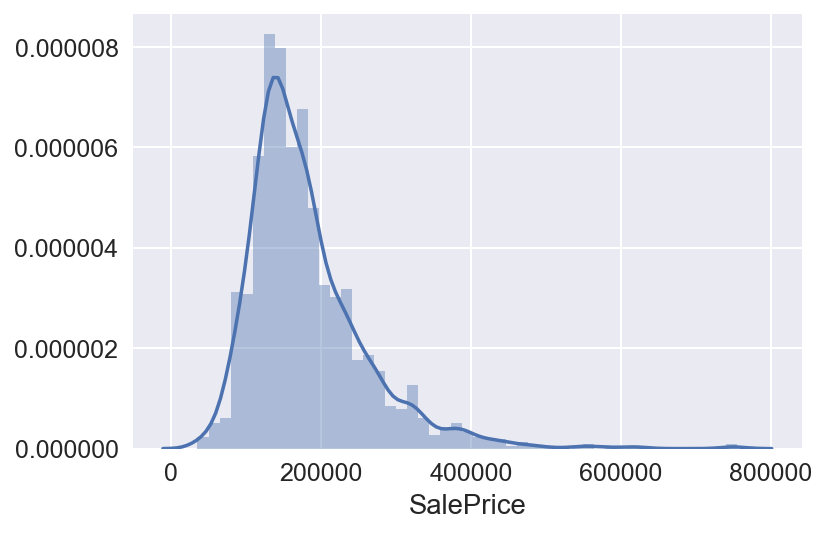

In [1792]:
#1.3.check target(dependent) variable

sns.distplot(train['SalePrice']);
print('Skewness: %f' % train['SalePrice'].skew())
train['SalePrice'].describe()    

Skewness: 0.121347


count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

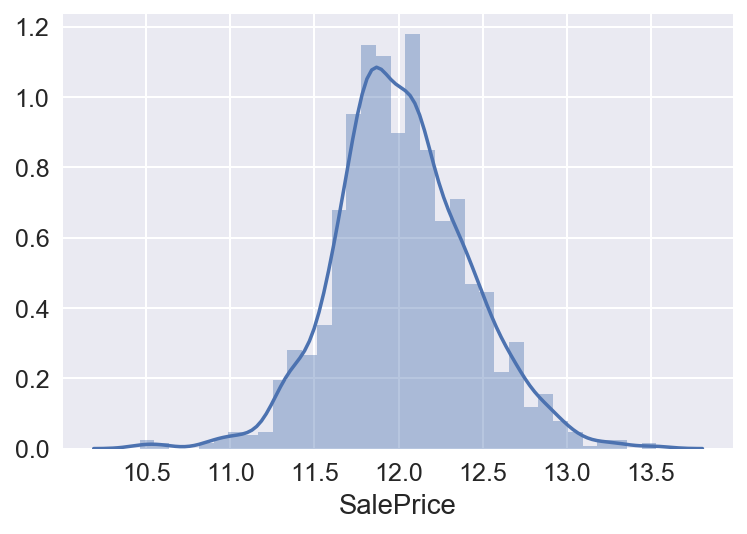

In [1793]:
#use log to adjust skewness
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice']);
print('Skewness: %f' % train['SalePrice'].skew())
y = train['SalePrice']
train['SalePrice'].describe()

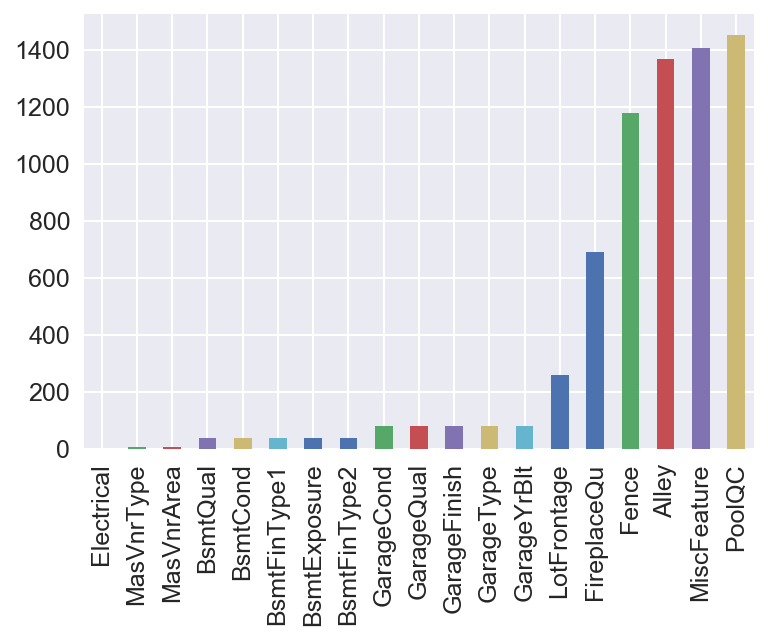

In [1794]:
#1.4.check missing vlues
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [1795]:
#2.Data Preparation


In [1796]:
#2.1.fill up or drop off missing data

In [1797]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [1798]:
#drop off the data mising over 20%
train = train.drop((missing_data[missing_data['Total'] > 1168]).index,1)

In [1799]:
#fill up missing data

# PoolQC : data description says NA means 'no pool'
train.loc[:, 'PoolArea'] = train.loc[:, 'PoolArea'].fillna(0)

# MiscFeature : data description says NA means 'no misc feature'
train.loc[:, 'MiscVal'] = train.loc[:, 'MiscVal'].fillna(0)

# FireplaceQu : data description says NA means 'no fireplace'
train.loc[:, 'FireplaceQu'] = train.loc[:, 'FireplaceQu'].fillna('No')
train.loc[:, 'Fireplaces'] = train.loc[:, 'Fireplaces'].fillna(0)

# LotFrontage : NA most likely means no lot frontage
train.loc[:, 'LotFrontage'] = train.loc[:, 'LotFrontage'].fillna(0)

# GarageType etc : data description says NA for garage features is 'no garage'
train.loc[:, 'GarageType'] = train.loc[:, 'GarageType'].fillna('No')
train.loc[:, 'GarageFinish'] = train.loc[:, 'GarageFinish'].fillna('No')
train.loc[:, 'GarageQual'] = train.loc[:, 'GarageQual'].fillna('No')
train.loc[:, 'GarageCond'] = train.loc[:, 'GarageCond'].fillna('No')
train.loc[:, 'GarageArea'] = train.loc[:, 'GarageArea'].fillna(0)
train.loc[:, 'GarageCars'] = train.loc[:, 'GarageCars'].fillna(0)
train.loc[:, 'GarageYrBlt'] = train.loc[:, 'GarageYrBlt'].fillna(0)


# BsmtQual etc : data description says NA for basement features is 'no basement'
train.loc[:, 'BsmtQual'] = train.loc[:, 'BsmtQual'].fillna('No')
train.loc[:, 'BsmtCond'] = train.loc[:, 'BsmtCond'].fillna('No')
train.loc[:, 'BsmtExposure'] = train.loc[:, 'BsmtExposure'].fillna('No')
train.loc[:, 'BsmtFinType1'] = train.loc[:, 'BsmtFinType1'].fillna('No')
train.loc[:, 'BsmtFinType2'] = train.loc[:, 'BsmtFinType2'].fillna('No')

# MasVnrType : NA most likely means no veneer
train.loc[:, 'MasVnrType'] = train.loc[:, 'MasVnrType'].fillna('No')
train.loc[:, 'MasVnrArea'] = train.loc[:, 'MasVnrArea'].fillna(0)

# Electrical : NA fill up no provider
train.loc[:, 'Electrical'] = train.loc[:, 'Electrical'].fillna('No')

In [1800]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
SalePrice,0,0.0
ExterCond,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
Foundation,0,0.0


In [1801]:
#check outcome
#Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include = ['object']).columns
numerical_features = train.select_dtypes(exclude = ['object']).columns
numerical_features = numerical_features.drop('SalePrice')
print('Numerical features : ' + str(len(numerical_features)))
print('Categorical features : ' + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features : 37
Categorical features : 39


In [1802]:
#2.2. transfer to numerical
#so far, there are 38 numerical columns adn 43 non-numerical columns

train = train.replace({'MSZoning' : {'C (all)' : 1, 'FV' : 2, 'RH' : 3, 'RL' : 4, 'RM' :5}})
train = train.replace({'Street' : {'Pave' : 1, 'Grvl' : 2}})
train = train.replace({'LotShape' : {'IR3' : 1, 'IR2' : 2, 'IR1' : 3, 'Reg' : 4}})
train = train.replace({'Utilities' : {'NoSeWa' : 1,'AllPub' : 2}})
train = train.replace({'LandContour' : {'Bnk': 2,'HLS' : 2,'Low' : 2,'Lvl' : 3}})
train = train.replace({'LotConfig' : {'Inside': 3,'FR2' : 2,'Corner' : 2,'FR3' : 2,'CulDSac' : 3}})
train = train.replace({'LandSlope' : {'Sev' : 1, 'Mod' : 2, 'Gtl' : 3}})
train = train.replace({'PavedDrive' : {'N' : 0, 'Y' : 1,'P' : 1}})
train = train.replace({'SaleCondition' : {'Abnorml' : 0, 'Alloca' : 0, 'AdjLand' : 0, 'Family' : 0, 'Normal' : 0, 'Partial' : 1}})

train = train.replace({'ExterQual' : {'Fa': 1,'TA' : 2,'Gd' : 3,'Ex' : 4}})
train = train.replace({'ExterCond' : {'Po': 1,'Fa':2,'TA' : 3,'Gd' : 4,'Ex' : 5}})
train = train.replace({'BsmtExposure' : {'Av': 2,'Gd' : 2,'Mn': 1,'NA' : 1,'No' : 1}})
train = train.replace({'Heating' : {'Floor': 1,'OthW' : 2,'Wall': 2,'GasA' : 3,'GasW' : 3,'Grav' : 2}})
train = train.replace({'HeatingQC' : {'Po': 1,'Fa':2,'TA' : 3,'Gd' : 4,'Ex' : 5}})
train = train.replace({'CentralAir' : {'N' : 0, 'Y' : 1}})
train = train.replace({'KitchenQual' : {'Fa': 1,'TA' : 2,'Gd' : 3,'Ex' : 4}})
train = train.replace({'Functional' : {'Maj2': 1,'Maj1':2,'Min1' : 2,'Min2' : 2,'Mod' : 2,'Sev' :2,'Typ' :2}})

train = train.replace({'BsmtFinType1' : {'GLQ': 2,'ALQ' : 1,'BLQ': 1,'GLQ' : 1,'LwQ' : 1,'NA' : 1,'Rec' : 1,'Unf' : 1}})
train = train.replace({'BsmtFinType2' : {'GLQ': 2,'ALQ' : 1,'BLQ': 1,'GLQ' : 1,'LwQ' : 1,'NA' : 1,'Rec' : 1,'Unf' : 1}})
train = train.replace({'BsmtQual' : {'NA': 0,'Fa':1,'TA' : 2,'Gd' : 3,'Ex' : 4}})
train = train.replace({'BsmtCond' : {'NA': 0,'Po' : 1,'Fa': 2,'TA' : 3,'Gd' : 4}})

train = train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2, 'NA':3 }})
train = train.replace({"FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}})

#leave 'Neighborhood', 'SaleType', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
#'Exterior2nd', 'MasVnrType', 'Foundation','BsmtQual','BsmtCond','BsmtFinType1', 'BsmtFinType2'
# 'GarageType', 'Condition1','Condition2'

In [1803]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include = ['object']).columns
numerical_features = train.select_dtypes(exclude = ['object']).columns
numerical_features = numerical_features.drop('SalePrice')
print('Numerical features : ' + str(len(numerical_features)))
print('Categorical features : ' + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features : 55
Categorical features : 21


In [1804]:
# 2.3.Create dummy features for categorical values via one-hot encoding
print("NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))
train_cat = pd.get_dummies(train_cat)
print("Remaining NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))

NAs for categorical features in train : 0
Remaining NAs for categorical features in train : 0


In [1805]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 163 entries, Neighborhood_Blmngtn to SaleType_WD
dtypes: uint8(163)
memory usage: 232.5 KB


In [1806]:
#2.4. variables select


In [1807]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
ExterQual        0.678840
KitchenQual      0.667893
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
FireplaceQu      0.546362
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
HeatingQC        0.473762
MasVnrArea       0.426776
BsmtFinSF1       0.372023
CentralAir       0.351599
GarageYrBlt      0.349013
WoodDeckSF       0.334135
SaleCondition    0.324471
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
BsmtExposure     0.300934
PavedDrive       0.286343
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
LotFrontage      0.179303
Heating          0.169499
ScreenPorch      0.121208
Functional       0.103863
PoolArea         0.069798
MoSold          

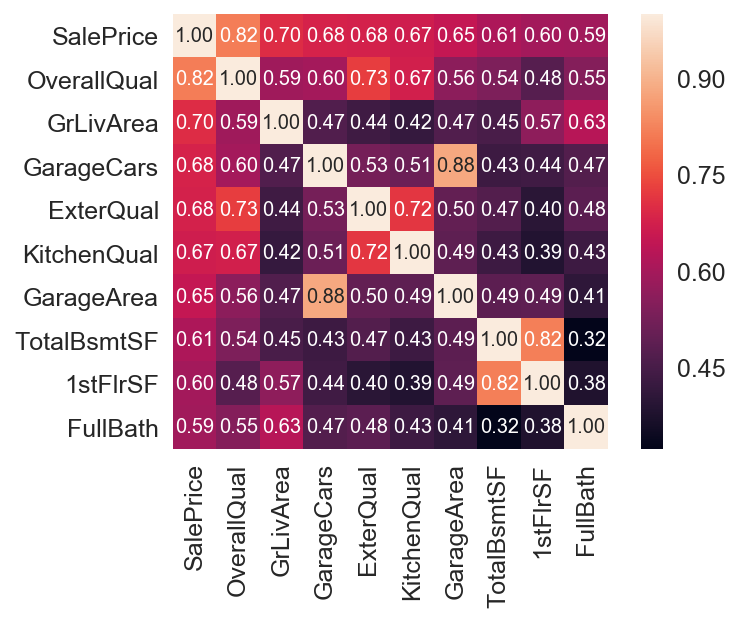

In [1808]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [1809]:
#according correlation shown, we choose 'OverallQual', 'GrLivArea', 'GarageCars', 'FullBath'
#, '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'YearBuilt', 'KitchenQual', 'GarageCars', as our independent variables 

Skewness: 1.366560


count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

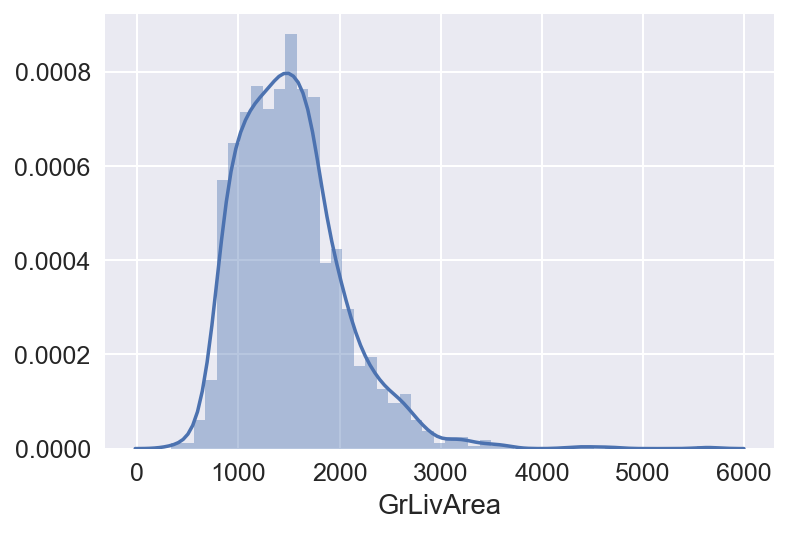

In [1810]:
# try to further fix outlier
sns.distplot(train['GrLivArea']);
print('Skewness: %f' % train['GrLivArea'].skew())
train['GrLivArea'].describe() 

Skewness: -0.006140


count    1460.000000
mean        7.268512
std         0.333303
min         5.814131
25%         7.030415
50%         7.289611
75%         7.483104
max         8.638171
Name: GrLivArea, dtype: float64

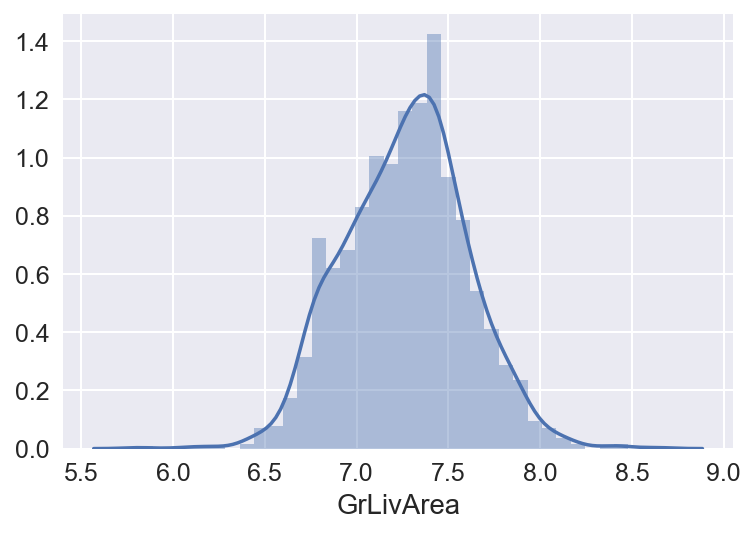

In [1811]:
train['GrLivArea'] = np.log1p(train['GrLivArea'])
sns.distplot(train['GrLivArea']);
print('Skewness: %f' % train['GrLivArea'].skew())

train['GrLivArea'].describe()

In [1812]:
#3.modeling


In [1813]:
#choose the variable we want, use Random Forest Regressor
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'FullBath','1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'YearBuilt']
x = train[cols].values
y = train['SalePrice'].values
x_scaled = preprocessing.StandardScaler().fit_transform(x)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))
X_train,X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.8, random_state=42)




In [1814]:
clfs = {
        'svm':svm.SVR(), 
        'RandomForestRegressor':RandomForestRegressor(n_estimators=400),
        'BayesianRidge':linear_model.BayesianRidge()
       }
for clf in clfs:
    try:
        clfs[clf].fit(X_train, y_train)
        y_pred = clfs[clf].predict(X_test)
        print(clf + " cost:" + str(np.sum(y_pred-y_test)/len(y_pred)) )
    except Exception as e:
        print(clf + " Error:")
        print(str(e))

svm cost:32.801519275371554
RandomForestRegressor cost:17.850734659813334
BayesianRidge cost:13.005192729342346


In [1815]:
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'FullBath','1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'YearBuilt']
x = train[cols].values
y = train['SalePrice'].values
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

clf = RandomForestRegressor(n_estimators=400)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)


[11.74604495 12.60822624 11.67613514 ... 12.59074497 11.80622444
 11.72020996]


In [1816]:
y_test

array([11.94795585, 12.69158354, 11.6526961 , ..., 12.50432738,
       11.9117083 , 11.42410518])

In [1817]:

sum(abs(y_pred - y_test))/len(y_pred)

0.12089102568299194

[11.74604495 12.60822624 11.67613514 ... 12.59074497 11.80622444
 11.72020996]
